In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('London Housing Data.csv')
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [3]:
data.shape

(13549, 6)

In [7]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [6]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

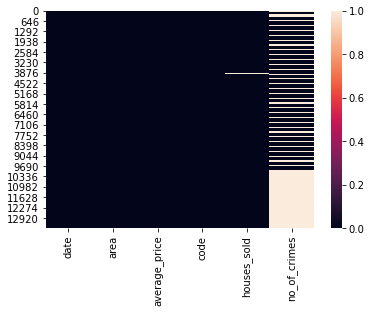

In [9]:
sns.heatmap(data.isnull())
plt.show()

In [10]:
# convert the datatype of date column to date-time format
data.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [14]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [15]:
# add a new column year in the dataframe which contains years only

data['year'] = data.date.dt.year
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [16]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
year                      int64
dtype: object

In [20]:
# add a new column month as a 2nd column in the dataframe
data.insert(2, 'month', data.date.dt.month)
data.head()

,date,area,month,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,1,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,2,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,3,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,4,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,5,84409,E09000001,10.0,NaN,1995


In [24]:
# remove columns month and year
data.drop(['month', 'year'], axis= 1, inplace=True)
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [27]:
# show all the records where # of crimes is 0 and how many such records are there

data[data.no_of_crimes == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [34]:
# what is the maximum and minimum average price per year in england
data['year'] = data.date.dt.year

data1 = data[data.area == 'england']


In [36]:
# data1.groupby('year').average_price.max()/min()/mean()
data1.groupby('year').average_price.max()

year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [37]:
data1.groupby('year').average_price.min()

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

In [38]:
# what is min and max # crimes per area
data.groupby('area').no_of_crimes.min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [39]:
data.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [42]:
# show the total count of records of each area where average price is less than 100000
data[data.average_price < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              